<center><b><font size="5">Проект 10: A/B тест мобильного приложения</font></b></center>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-названия-столбцов" data-toc-modified-id="Замена-названия-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена названия столбцов</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Добавление-столбца-дат" data-toc-modified-id="Добавление-столбца-дат-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление столбца дат</a></span></li></ul></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение и проверка данных</a></span><ul class="toc-item"><li><span><a href="#Количество-событий-в-логе" data-toc-modified-id="Количество-событий-в-логе-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество событий в логе</a></span></li><li><span><a href="#Количество-пользователей-в-логе" data-toc-modified-id="Количество-пользователей-в-логе-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество пользователей в логе</a></span></li><li><span><a href="#Среднее-количество-событий-на-пользователя" data-toc-modified-id="Среднее-количество-событий-на-пользователя-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Среднее количество событий на пользователя</a></span></li><li><span><a href="#Период-данных" data-toc-modified-id="Период-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Период данных</a></span></li><li><span><a href="#Пользователи-в-трех-экспериментальных-группах" data-toc-modified-id="Пользователи-в-трех-экспериментальных-группах-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Пользователи в трех экспериментальных группах</a></span></li></ul></li><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Воронка событий</a></span><ul class="toc-item"><li><span><a href="#События-по-частоте" data-toc-modified-id="События-по-частоте-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>События по частоте</a></span></li><li><span><a href="#Количество-пользователей-на-событие" data-toc-modified-id="Количество-пользователей-на-событие-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество пользователей на событие</a></span></li><li><span><a href="#Доля-пользователей-по-отношению-к-предыдущему-шагу" data-toc-modified-id="Доля-пользователей-по-отношению-к-предыдущему-шагу-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Доля пользователей по отношению к предыдущему шагу</a></span></li></ul></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Количество-пользователей-в-каждой-экспериментальной-группе" data-toc-modified-id="Количество-пользователей-в-каждой-экспериментальной-группе-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Количество пользователей в каждой экспериментальной группе</a></span></li><li><span><a href="#A/B-тест" data-toc-modified-id="A/B-тест-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>A/B тест</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

### Общая информация о данных

In [106]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
import math as mth
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = (10, 7)

In [107]:
# выгрузим датасет в переменную df
df = pd.read_csv('data.csv', sep='\t')
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


По информации из датасета можно сказать, что в даннных нет пропусков и нулевых значений, названия столбцов необходимо привести к нижнему регистру и переименовать, указать правильный формат даты и привести ее к нужному типу данных.

### Подготовка данных

#### Замена названия столбцов

In [109]:
# заменим названия столбцов
df.columns = ['event_name', 'user_id', 'event_time', 'group']

In [110]:
df.head()

,event_name,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


#### Замена типов данных

In [111]:
# переведем дату из формата unix в дату и время
df['event_time'] = pd.to_datetime(df['event_time'], unit='s')

In [112]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   event_time  244126 non-null  datetime64[ns]
 3   group       244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


#### Добавление столбца дат

In [113]:
df['date'] = df['event_time'].dt.date

In [114]:
df.head()

,event_name,user_id,event_time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [115]:
# проверим наличие дубликатов
df.duplicated().sum()

413

In [116]:
# удалим дубликаты
df.drop_duplicates(inplace=True)

In [117]:
df.reset_index(drop=True, inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_time  243713 non-null  datetime64[ns]
 3   group       243713 non-null  int64         
 4   date        243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB


В ходе предобработки данных были заменены названия столбцов на более понятный и правильный формат, заменен тип данных даты и времени событий на datetime, добавлен столбец с датой, а также удалены дубликаты.

### Изучение и проверка данных

#### Количество событий в логе

In [119]:
df['event_name'].nunique()

5

In [120]:
df['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [121]:
# переименуем события для удобства
df.replace({'Tutorial': 'Обучение', 'MainScreenAppear': 'Главная страница', 'OffersScreenAppear': 'Страница товаров',
       'CartScreenAppear': 'Корзина', 'PaymentScreenSuccessful': 'Успешная оплата'}, inplace=True)
df['event_name'].unique()

array(['Главная страница', 'Успешная оплата', 'Корзина',
       'Страница товаров', 'Обучение'], dtype=object)

Всего в логе содержится информация о 5 событиях.

#### Количество пользователей в логе

In [122]:
df['user_id'].nunique()

7551

Всего в логе 7551 пользователей. 

#### Среднее количество событий на пользователя

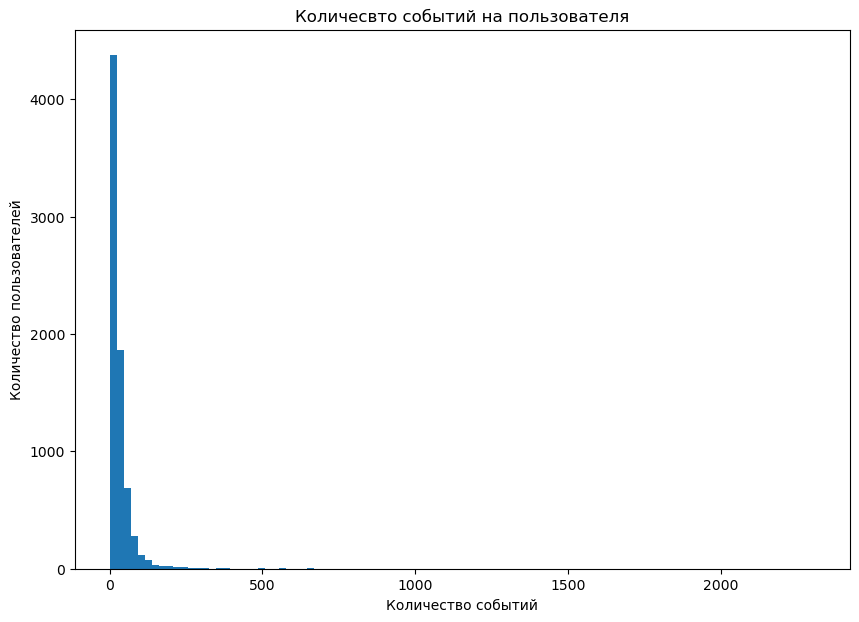

In [123]:
plt.hist(df.groupby('user_id')['event_name'].count(), bins=100)
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Количесвто событий на пользователя');

По графику видно, что большинство пользователей имеет менее 100 событий. Присутствуют аномальные значения количества событий возможно слишком активных пользователей, которые могут исказить результат. Для избежания искажения используем медиану.

In [124]:
df.groupby('user_id')['event_name'].count().median()

20.0

В среднем на каждого пользователя приходится около 20 событий.

#### Период данных

In [125]:
# найдем минимальное и максимальное значение даты
print('Начало: {} \n Конец: {}'.format(df['date'].min(), df['date'].max()))

Начало: 2019-07-25 
 Конец: 2019-08-07


В датасете содержатся данные с 25 июля по 7 августа 2019 года. Построим гистограмму по дате и времени, чтобы проанализировать количество данных за каждый день.

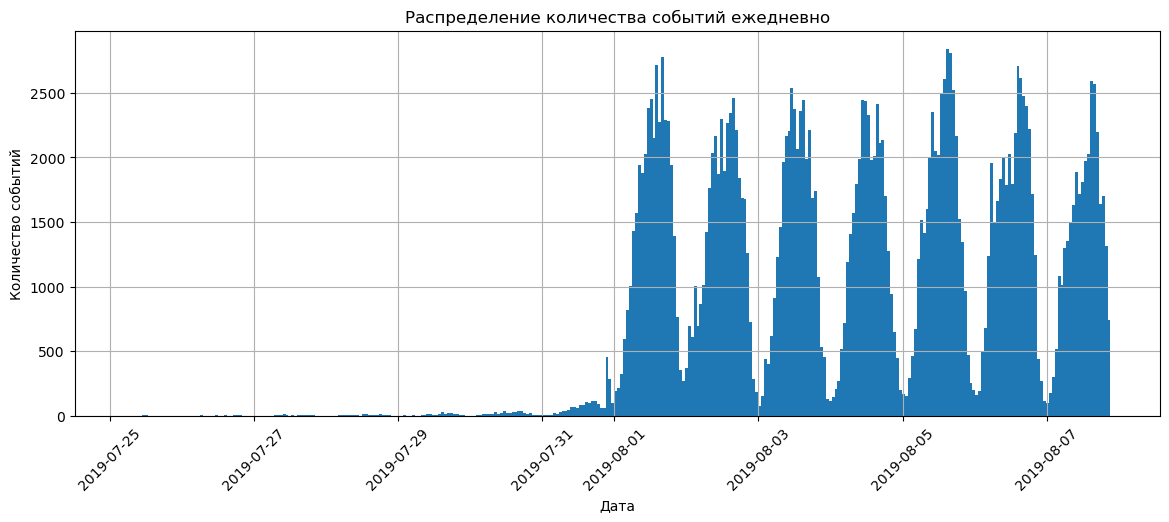

In [126]:
df['event_time'].hist(bins=14*24, figsize=(14, 5));
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение количества событий ежедневно');

Из гистограммы видно не равное распределение количества записей на определенные даты. Более полные данные начинаются с 1 августа. Отсеим данные за предыдущие дни из датасета.

In [127]:
first_date = dt.strptime('2019-08-01', '%Y-%m-%d').date()
first_date

datetime.date(2019, 8, 1)

In [128]:
df_last = df.copy()
df.query('date >= @first_date', inplace=True)

In [129]:
# посчитаем количество потерянных пользователей
lost_users = df_last[~df_last['user_id'].isin(df['user_id'])]['user_id'].nunique()

In [130]:
print(f'После удаления мы потеряли {lost_users} пользователей')
print(f'Сокращение датасета после удаления старых неполных данных = {df_last.shape[0] / df.shape[0] - 1 : .2%}')

После удаления мы потеряли 17 пользователей
Сокращение датасета после удаления старых неполных данных =  1.17%


Мы обладаем данными с 1 по 7 августа 2019 года. Сокращение событий составило 1.17%, потеряли 17 пользователей. Это не критично.

#### Пользователи в трех экспериментальных группах

Проверим, есть ли у нас пользователи, состоящие сразу в трех экспериментальных группах.

In [131]:
(
    df.groupby('user_id', as_index=False)
    .agg({'group': 'nunique'})
    .query('group > 1')
    .count()
)

user_id    0
group      0
dtype: int64

Каждый пользователь состоит только в одной экспериментальной группе. Следовательно, сбор данных для эксперимента был произведен корректно.

### Воронка событий

#### События по частоте

In [132]:
event_count = pd.DataFrame(df['event_name'].value_counts().sort_values(ascending=False).reset_index())
event_count.columns = ['event_name', 'count']
event_count

,event_name,count
0,Главная страница,117328
1,Страница товаров,46333
2,Корзина,42303
3,Успешная оплата,33918
4,Обучение,1005


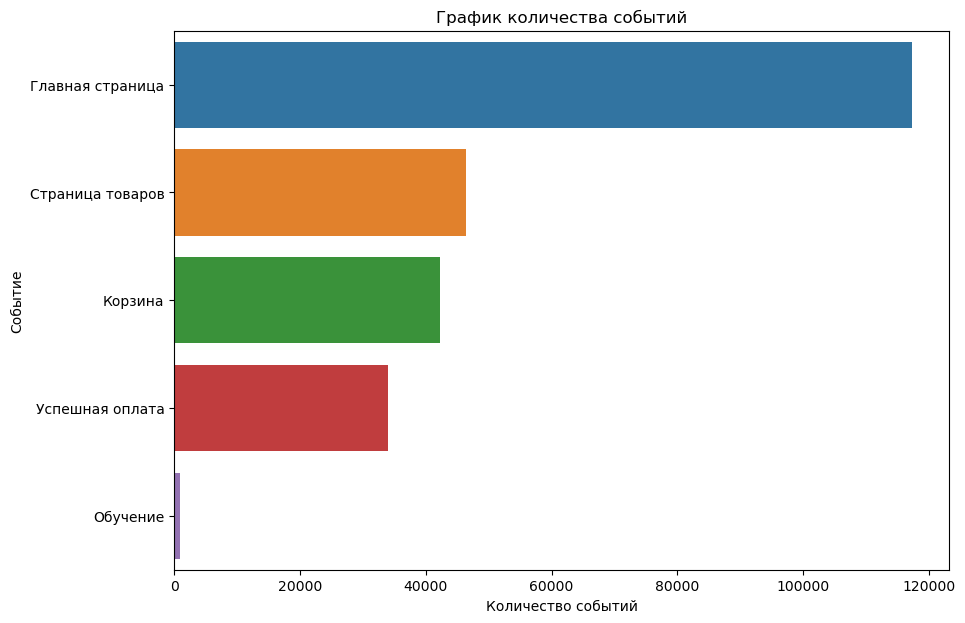

In [133]:
sns.barplot(data=event_count, x='count', y='event_name')
plt.xlabel('Количество событий')
plt.ylabel('Событие')
plt.title('График количества событий');

Наиболее частым событием является посещение Главной страницы, наименее частым - Обучение

#### Количество пользователей на событие

In [134]:
user_count = (
    df.groupby('event_name', as_index=False)
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
)
user_count.columns = ['event_name', 'u_count']
user_count

,event_name,u_count
0,Главная страница,7419
3,Страница товаров,4593
1,Корзина,3734
4,Успешная оплата,3539
2,Обучение,840


Большинство пользователей совершают заход на Главную страницу, меньшеньство - Обучение. Порядок такой же, как и при вычислении частоты событий в датасете. 

In [135]:
# доля пользователей, которая хоть раз совершала событие
user_count['percent'] = user_count['u_count'].map(lambda x: '{:.2f}%'.format(x / df["user_id"].nunique() * 100))
user_count.reset_index(drop=True, inplace=True)
user_count

,event_name,u_count,percent
0,Главная страница,7419,98.47%
1,Страница товаров,4593,60.96%
2,Корзина,3734,49.56%
3,Успешная оплата,3539,46.97%
4,Обучение,840,11.15%


In [136]:
# построим воронку событий по числу пользователей
px.funnel(user_count[user_count['event_name'] != "Обучение"], x = 'u_count', y = 'event_name')

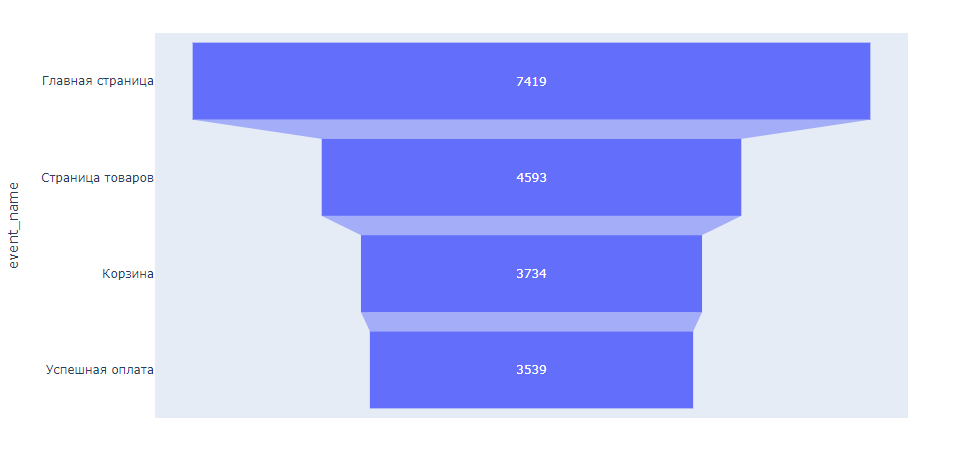

Главную страницу посещают 98% пользователей, страницу товаров - около 61%, корзину - около 50%, оплачивают товар около 47%, а страницу обучения посещают лишь 11%.

Можно предположить, что события происходят в следующем порядке:

    - посещение главной страницы;
    - просмотр товаров;
    - переход в корзину;
    - успешная оплата.
    
Страницу с обучением пользователи открывают по желанию. Малое число пользователей говорит о том, что обучение не является обязательным в приложении. Можно не учитывать данное событие в следующих шагах.

#### Доля пользователей по отношению к предыдущему шагу

In [137]:
# удалим обучение из нашей воронки
user_count.query('event_name != "Обучение"', inplace=True)
user_count

,event_name,u_count,percent
0,Главная страница,7419,98.47%
1,Страница товаров,4593,60.96%
2,Корзина,3734,49.56%
3,Успешная оплата,3539,46.97%


In [138]:
# посчитаем долю пользователей по отношению к предыдущему шагу
user_count['percent_to_last'] = user_count['u_count'] / user_count['u_count'].shift(periods=1).fillna(user_count['u_count'][0]) * 100
user_count['percent_to_last'] = user_count['percent_to_last'].map(lambda x: '{:.2f}%'.format(x))

In [139]:
user_count.head()

,event_name,u_count,percent,percent_to_last
0,Главная страница,7419,98.47%,100.00%
1,Страница товаров,4593,60.96%,61.91%
2,Корзина,3734,49.56%,81.30%
3,Успешная оплата,3539,46.97%,94.78%


In [140]:
# построим воронку событий с отношением к общему количеству пользователей и к количеству пользователей на предыдущем шаге
go.Figure(go.Funnel(
    y = user_count['event_name'],
    x = user_count['u_count'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"]})
)

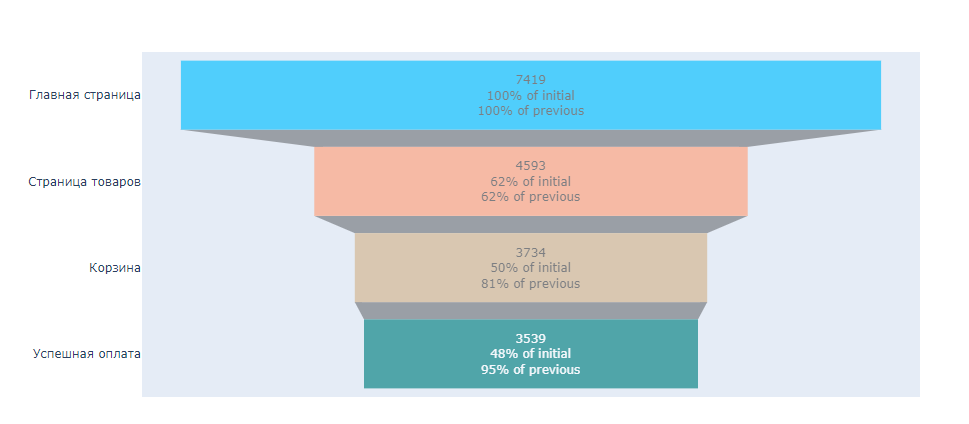

Больше всего пользователей мы теряем на шаге перехода с главной страницы на страницу товара. От первого события до оплаты доходит лишь 48% пользователей.

### Изучение результатов эксперимента

#### Количество пользователей в каждой экспериментальной группе

In [141]:
group_ucount = df.groupby('group')['user_id'].agg('nunique')
group_ucount

group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

В контрольных группах 246 и 247 находятся 2484 и 2513 пользователей соответственно. В экспериментальной группе 248 - 2537 пользователей.

#### A/B тест

Сформулируем гипотезы: 
    
    H0: доли уникальных посетителей, побывавших на этапе воронки, одинаковы.
    H1: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разница.
    
Для проверки будем использовать proportion_ztest    

In [142]:
# удалим из логов событие "Обучение"
df_new = df.query('event_name != "Обучение"')
df_new['event_name'].unique()

array(['Главная страница', 'Страница товаров', 'Корзина',
       'Успешная оплата'], dtype=object)

Для удобства заменим цифры, обозначающие группы, на буквы.

In [143]:
df_new.replace({246: 'A1', 247: 'A2', 248: 'B'}, inplace=True)
df_new['group'].unique()

array(['A1', 'A2', 'B'], dtype=object)

In [144]:
# для удобства создадим сводную таблицу с количеством пользователей для каждого события в каждой группе
event_grouped = df_new.pivot_table(
    index='event_name', 
    columns='group', 
    values='user_id', 
    aggfunc='nunique',
    margins=True
).reset_index()
event_grouped

group,event_name,A1,A2,B,All
0,Главная страница,2450,2476,2493,7419
1,Корзина,1266,1238,1230,3734
2,Страница товаров,1542,1520,1531,4593
3,Успешная оплата,1200,1158,1181,3539
4,All,2483,2512,2535,7530


In [145]:
# создадим столбец, в котором объединим количество уникальных пользователей для двух контрольных групп
event_grouped['A'] = event_grouped['A1'] + event_grouped['A2']
event_grouped

group,event_name,A1,A2,B,All,A
0,Главная страница,2450,2476,2493,7419,4926
1,Корзина,1266,1238,1230,3734,2504
2,Страница товаров,1542,1520,1531,4593,3062
3,Успешная оплата,1200,1158,1181,3539,2358
4,All,2483,2512,2535,7530,4995


In [146]:
event_grouped.drop(columns='All', inplace=True)

In [147]:
event_grouped['event_name'].replace({'All': 'Всего пользователей'}, inplace=True)

In [148]:
event_grouped

group,event_name,A1,A2,B,A
0,Главная страница,2450,2476,2493,4926
1,Корзина,1266,1238,1230,2504
2,Страница товаров,1542,1520,1531,3062
3,Успешная оплата,1200,1158,1181,2358
4,Всего пользователей,2483,2512,2535,4995


In [149]:
# для удобства создадим функцию проведения z-test`а
def z_test(df, exp_group1, exp_group2, event, alpha):
    count = np.array(
        [df.query('event_name == @event')[exp_group1].sum(), 
         df.query('event_name == @event')[exp_group2].sum()]
    )

    nobs = np.array(
        [df.query('event_name == "Всего пользователей"')[exp_group1].sum(), 
         df.query('event_name == "Всего пользователей"')[exp_group2].sum()]
    )
    
    
    
    stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
    
    # найдем статистическую значимость при помощи поправки Бонферрони
    alpha = alpha / 16
    
    if p_value >= alpha:
        print(f'p_value = {p_value: .2f}, \nalpha = {alpha}', '\nНе отвергаем нулевую гипотезу')
    else:
        print(f'p_value = {p_value: .2f}, \nalpha = {alpha}', '\nОтвергаем нулевую гипотезу')

In [150]:
z_test(event_grouped, 'A1', 'A2', 'Корзина', 0.05)

p_value =  0.23, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу


Так как сравнение будет проводиться 16 раз (4 раза сравнение контрольных(по числу событий в логах), 8 раз сравнение контрольных с экспериментальной, 4 раза сравнения объединенных контрольных с экспериментальной), воспользуемся методом Бонферрони и разделим уровень статистической значимости на 16.

In [151]:
# создадим функцию, выводящую общий результат сравнения групп
def result(group1, group2):
    for event in df_new['event_name'].unique():
        print('Группы {}/{}'.format(group1, group2), f'\nСобытие: {event}')
        z_test(event_grouped, group1, group2, event, 0.05)
        print('')

In [152]:
# сравним контрольные группы
result('A1', 'A2')

Группы A1/A2 
Событие: Главная страница
p_value =  0.75, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A1/A2 
Событие: Страница товаров
p_value =  0.25, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A1/A2 
Событие: Корзина
p_value =  0.23, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A1/A2 
Событие: Успешная оплата
p_value =  0.11, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу



Во всех четырех тестах не обнаружено статистической разницы. Следовательно, можно сказать, что разбиение на контрольные группы работает корректно.

In [153]:
# проверим статистическую разницу для контрольной группы A1 и экспериментальной B
result('A1', 'B')

Группы A1/B 
Событие: Главная страница
p_value =  0.34, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A1/B 
Событие: Страница товаров
p_value =  0.21, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A1/B 
Событие: Корзина
p_value =  0.08, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A1/B 
Событие: Успешная оплата
p_value =  0.22, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу



In [154]:
# проверим статистическую разницу для контрольной группы A2 и экспериментальной B
result('A2', 'B')

Группы A2/B 
Событие: Главная страница
p_value =  0.52, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A2/B 
Событие: Страница товаров
p_value =  0.93, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A2/B 
Событие: Корзина
p_value =  0.59, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A2/B 
Событие: Успешная оплата
p_value =  0.73, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу



In [155]:
# проверим статистическую разницу для контрольной группы A и экспериментальной B
result('A', 'B')

Группы A/B 
Событие: Главная страница
p_value =  0.35, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A/B 
Событие: Страница товаров
p_value =  0.45, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A/B 
Событие: Корзина
p_value =  0.19, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу

Группы A/B 
Событие: Успешная оплата
p_value =  0.61, 
alpha = 0.003125 
Не отвергаем нулевую гипотезу



### Вывод

В ходе выполнения проекта была выполнена предобработка данных. Выяснено, что в логах содержится информация только о 5 событиях: Посещение главной страницы (самое популярное), Страницы товаров, Корзины, Успешной оплаты и Обучения (самое непопулярное). Обучение в приложении не является обязательным.

Всего 7551 пользователь. В виду неполноты данных за все время, представленное в датасете, для исследования был взят период с 1 по 7 августа. После отсечения потеряли 17 пользователей и 1.17% данных, что не критично.

Каждый пользователь состоит лишь в одной группе, что говорит о корректности сбора данных.

В ходе изучения воронки событий было выяснено, что большинство пользователей теряются при переходе с главной страницы на страницу товаров. До покупки доходят почти 47% пользователей.

В резульате проведения экспериментов выяснили, что разницы между контрольными группами и группами A и B нет (между долями уникальных посетителей, побывавших на этапе воронки, нет значимой разницы).  

В качестве уровня статистической значимости использовали значение 0.05, так как 5% не критичный результат возможных ошибок в данном случае. В виду проведения эксперимента 16 раз разделил параметр alpha на 16 (метод Бонферрони).

Рекомендуется изменить оформление главной страницы. Сделать переход на страницы товаров более простым и интуитивно понятным, так как именно на этом шаге теряем большинство пользователей. Если исправление главной страницы слишком затратно, то рекомендуется при первом запуске приложения запустить обучение.